# Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this [article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating wd be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Exploring the data

Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

Dataquest collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [1]:
import pandas as pd
previous = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")

previous.info()
previous.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
after.info()
after.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [3]:
## Isolating the needed columns and making a copy

fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [4]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


## Description of sampling in the two studies

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested in describing. It seems more likely that it isn't, mostly because this sample is subject to temporal trends (e.g., movies in 2015 might have been outstandingly good or bad compared to other years).

The sampling conditions for our other sample were the following (as it can be read in the README.md of the data set's repository):

- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (it's unclear how many from the README.md or from the data).

This second sample is also subject to temporal trends, and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

Hence we won't be able to decide whether there was a change in the rating system of Fandango between those two time points with the data available to us. Instead of trying to determine whether there has been any change in Fandango's rating system following Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

To identify "popular" movies, we'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

In [5]:
print(fandango_previous['Fandango_votes'].describe())

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64


While for the original data collected by Hickey we can confirm that all the movies in the dataset contain at least 30 fan ratings, we don't have any comparable information in the dataset for the movies released in 2016. We are drawing a sample of ten movies and check whether they at least have 30 reviews orr more.

In [6]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of April 2018, these are the fan ratings that were found:

| **Movie**                               | **Fan Ratings** |
|-----------------------------------------|-----------------|
| Mechanic: Resurrection                  | 2247            |
| Warcraft                                | 7271            |
| Max Steel                               | 493             |
| Me Before You                           | 5263            |
| Fantastic Beasts and Where to Find Them | 13400           |
| Cell                                    | 17              |
| Genius                                  | 127             |
| Sully                                   | 11877           |
| A Hologram for the King                 | 500             |
| Captain America: Civil War              | 35057           |

90% of the movies in our sample are popular. This is enough for us to move forward with the analysis.

## Isolating the samples we need

We now clean the data so that the first dataset only contains movies released in 2015, and the second dataset only movies released in 2016.

In [7]:
# Extract the year using regex and save it as a new column
fandango_previous['Year'] =fandango_previous['FILM'].str.extract(r'\((\d{4})\)')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [8]:
print(fandango_previous['Year'].value_counts())

2015    129
2014     17
Name: Year, dtype: int64


In [9]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015']

In [10]:
print(fandango_2015['Year'].value_counts())

2015    129
Name: Year, dtype: int64


In [11]:
print(fandango_after['year'].value_counts())

2016    191
2017     23
Name: year, dtype: int64


In [12]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016]

In [13]:
print(fandango_2016['year'].value_counts())

2016    191
Name: year, dtype: int64


## Comparing the distribution of ratings in 2015 and 2016

If the handling of ratings should have changed between 2015 and 2016, we would expect to see the differences in the shape of the rating distributions. This is what we will examine now.

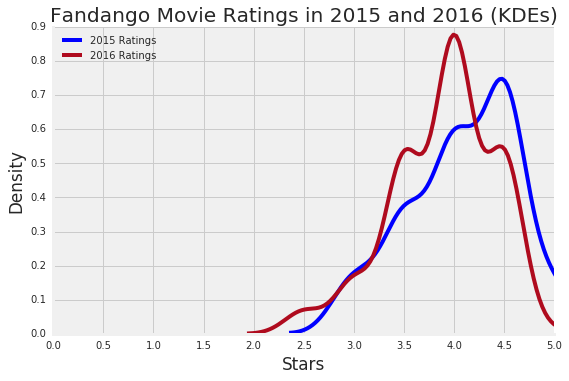

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
%matplotlib inline

# Create plot
fig, ax = plt.subplots(figsize=(8, 5.5))

# Set style
plt.style.use('fivethirtyeight')

# KDE plot #1
sns.kdeplot(data=fandango_2015['Fandango_Stars'], ax=ax, color='blue', label='2015 Ratings')

# KDE plot #2
sns.kdeplot(data=fandango_2016['fandango'], ax=ax, color='#af0b1e', label='2016 Ratings')

# Customize the plot
ax.set_title('Fandango Movie Ratings in 2015 and 2016 (KDEs)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(arange(0,5.1,.5))
plt.xlabel('Stars')
plt.ylabel('Density')
plt.xlim(0,5) # because ratings start at 0 and end at 5

# Adding legend
plt.legend(loc='upper left')
plt.show()


We find that both distributions are strongly left-skewed. In comparison to 2015, the 2016 distribution is shifted more to the left and resembles somewhat more of a bellshape, like a normal distribution. On average ratings were slightly lower in 2016 than in 2015.

We might be able to take this as evidence that the way that ratings were handled changed from 2015 to 2016. While 2015 looks more 'unnaturally' stacked towards positive reviews, the 2016 distribution is more symmetric and exhibits a longer negative tail, indicating that there are more negative reviews spread out inthe tail. (These would have been more likely to be shifted to the body of the distribution in 2015 due to the uprounding that took place.)

## Comparing relative frequencies

In order to increase the granularity of our analysis, we now look at the frequency distributions and percentage of each star rating category.

In [32]:
# 2015
print(fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100)

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64


In [33]:
# 2016
print(fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100)

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


These distributions show that the number of 5 star ratings clearly dropped between 2015 and 2016. While in 2015 almost 7% of movies received such a top rating, in 2016, we just see 0.52% of movies receive such a rating in 2016. Also the share of low ratings, such as 2.5 and 3.0 ratings increased in 2016. In 2015 we did not even observe any ratings below 3.0. Generally, there has also been a move towards the centre of the distribution, with a mich higher share of movies ending up in the 3.5 or 4.0 categories in 2016 (64%) than in 2015 (45%).

## Determining the direction of change

Still better insights will be learned when examining the mean, median and mode of each distribution.

In [38]:
# 2015
print("2015")
print(fandango_2015['Fandango_Stars'].mean())
print(fandango_2015['Fandango_Stars'].median())
print(fandango_2015['Fandango_Stars'].mode()[0])
print('\n')

# 2016
print("2016")
print(fandango_2016['fandango'].mean())
print(fandango_2016['fandango'].median())
print(fandango_2016['fandango'].mode()[0])

2015
4.0852713178294575
4.0
4.5


2016
3.887434554973822
4.0
4.0


These numbers support what we observed in the kernel density plots. The arithmetic mean decreased from 4.09 in 2015 to 3.89 in 2016, while the median remained the same at 4.0. But also, the most frequent category, the mdoe, was at the rating 4.5 in 2015, and this decreased to 4.0 in 2016. Here's a visualisation of this pattern as a bar plot.

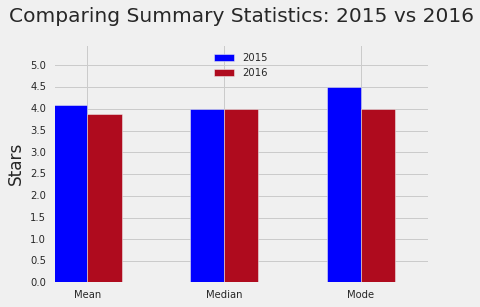

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange

# Create dataframe from statistics
summary = pd.DataFrame()
summary['2015'] = [fandango_2015['Fandango_Stars'].mean(), fandango_2015['Fandango_Stars'].median(), fandango_2015['Fandango_Stars'].mode()[0]]
summary['2016'] = [fandango_2016['fandango'].mean(), fandango_2016['fandango'].median(), fandango_2016['fandango'].mode()[0]]
summary.index = ['Mean', 'Median', 'Mode']

# Set style
plt.style.use('fivethirtyeight')

# Create bar plots 
ax = summary['2015'].plot.bar(color='blue', align='center', label='2015', width=0.25, position=1)
summary['2016'].plot.bar(color='#af0b1e', align='center', label='2016', width=0.25, position=0, ax=ax)

# Titles, legends, etc
plt.title('Comparing Summary Statistics: 2015 vs 2016', y=1.07)
plt.ylim(0, 5.5)
plt.yticks(arange(0, 5.1, 0.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')

ax.set_xticks([0, 1, 2])  # Set positions of the ticks
ax.set_xticklabels(['Mean', 'Median', 'Mode'], rotation=0) 


## Conclusion

Our hypothesis of a change in the handling of ratings on the Fandango website is supported by this evidence. We found that movie ratings indeed on average decreased from 2015 to 2016. Examination of the distributions showed that the 2015 distribution was more strongly shifted to the right with a less pronounced left tail. This is line with the practice of only rounding up any of the ratings in 2015, leading to a kind of 'bunching' towards the right end of the distribution. 

The 206 distribution, on the other hand, was more symmetrical, had more negative ratings and showed far fewer extremely positive ratings. Instead a lot more ratings were concetrated in the centre of the distribution.

Overall, it seems plausible that the handling of ratings on the website changed in 2016.